# Como saber si mi caja negra esta bien entrenada?

Haciendo un repaso:

1. Obtuvimos datos utiles para resolver nuestro problema y los convertimos en una tabla
2. Separamos nuestra tabla en dos: una tabla de **Entrenamiento** y una de **Prueba**
3. Utilizamos la tabla de entrenamiento para Entrenar una caja negra que me permite hacer predicciones

**Ahora utilizaremos la tabla de Prueba** para saber si nuestra caja negra esta bien entrenada aprovechando que en esta tabla de Prueba tenemos **datos que la caja negra nunca ha visto** y de los cuales **sabemos cuales deberian ser las predicciones correctas**.

![Error de prediccion de caja negra](img/error_prediccion_caja_negra.png)

Como dijimos ya hay metricas definidas y bien estudiadas para poder medir que tan bien entrenada esta una caja negra. Utilizaremos distintas medidas segun sean de **Regresion** o de **Clasificacion** 

Ahora solo veremos una para cada metodo y mas adelante en esta unidad veremos mas.

**Para regresion:**
- **Error cuadratico medio**: es la suma de las diferencias elevadas al cuadrado. Las diferencias se refieren a la resta entre cada valor predicho y el real. Cuanto menor sea este error mejor entrenada estara nuestra caja negra de regresion.

**Para clasificacion:**
- **Porcentaje de aciertos (Accuracy)**: cuantas predicciones hemos acertado dividido el total de predicciones. Cuanto mayor sea la cantidad de aciertos mejor entrenada estara nuestra caja negra de clasificacion.

In [1]:
from sklearn import metrics

In [2]:
# supongamos que los datos verdaderos son
y_verdadero = [1.0, 2.0, 3.0, 4.0]
y_predicho = [1.3, 2.1, 3.2, 4.8]

In [3]:
metrics.mean_squared_error(y_verdadero, y_predicho)

0.19499999999999995

In [4]:
# supongamos que los datos verdaderos son
y_verdadero = ["benigno", "maligno", "maligno", "benigno", "benigno"]
y_predicho = ["benigno", "maligno", "maligno", "maligno", "benigno"]

In [5]:
metrics.accuracy_score(y_verdadero, y_predicho)

0.8

## Sesgo y Varianza (Bias y Variance)

Aqui veremos cuales son los problemas mas comunes al entrenar una caja negra. Como detectarlos y como corregirlos. Para ello empezaremos calculando el error para las dos tablas (Entrenamiento y Prueba) por separado. 

![Error de prediccion de caja negra](img/train_test_errors.png)

Una vez calculados los errores para ambas tablas analizaremos los cuatro posibles casos donde el error de entrenamiento puede ser bajo o alto y para cada uno de estos casos el error de prueba puede ser similar al de entrenamiento o mucho mayor:

**Sesgo Bajo y Varianza Alta:**
- Error de Entrenamiento:  1% (**bajo**)
- Error de Prueba: 10% (**mucho mayor al de entrenamiento**)

**Sesgo Alto y Varianza Baja:**
- Error de Entrenamiento: 15% (**alto**)
- Error de Prueba: 16% (**similar al de entrenamiento**)

**Sesgo Alto y Varianza Alta:**
- Error de Entrenamiento: 15% (**alto**)
- Error de Prueba: 30% (**mucho mayor al de entrenamiento**)

**Sesgo Bajo y Varianza Baja (lo que buscamos):**
- Error de Entrenamiento:  0.5% (**bajo**)
- Error de Prueba:  1.0% (**bajo**)

Como vemos el objetivo es obtener los errores de Entrenamiento y Prueba bajos.

- El **Error de Entrenamiento alto** (tambien conocido como **Underfitting** en ingles) puede estar dado por una de las siguientes condiciones:
  - Necesitamos mas datos para entrenar nuestra caja negra
  - Necesitamos una caja negra que pueda predecir datos complejos, por ejemplo los ensambles pueden predecir datos mas complejos que una regresion lineal porque no asumen ninguna hipotesis respecto a los datos.
- El **Error de Prueba alto** (tambien conocido como **Overfitting** en ingles) puede estar dado por una de las siguientes condiciones:
  - Necesitamos mas datos para entrenar nuestra caja negra
  - Necesitamos una caja negra mas simple o un metodo para evitar que la caja negra se ajuste demasiado a los datos de prueba. Estos metodos se llaman de **regularizacion**

## Otras metricas

### Para clasificacion:
    
Cuando realizamos una clasificacion intervienen varios factores:
1. Puede haber muchos mas datos de una clase que de otra y nos llevara a un accuracy alto pero que no es util
2. La mayoria de los algoritmos de clasificacion nos da la **probabilidad** de que un dato sea de una clase u otra por lo que deberemos elegir un **limite o umbral** a partir del cual decimos que es de una clase u otra.

Elegido un umbral para la clasificacion, la matriz de confusion nos permite ver cuantos datos de cada clase han sido bien o mal clasificados y aparecen **dos tipos de errores**:
1. Cuando decimos que la prediccion es positiva y en verdad es negativa: **Falso Positivo**
2. Cuando decimos que la prediccion es negativa y en verdad es positiva: **Falso Negativo**

Unas primeras metricas surgen de analizar la proporcion de estos dos tipos de errores:

- La proporcion de **Falsos Positivos** (FPR = FP / N) se conoce tambien como **Error de Tipo 1**. Podemos pensar en ellos con la pregunta: De los que son realmente negativos cuantos no acerte?
- La proporcion de **Falsos Negativos** (FNR = FN / P) se conoce tambien como **Error de Tipo 2**. Podemos pensar en ellos con la pregunta: De los que son realmente positivos cuantos no acerte?

Veamos un ejemplo:

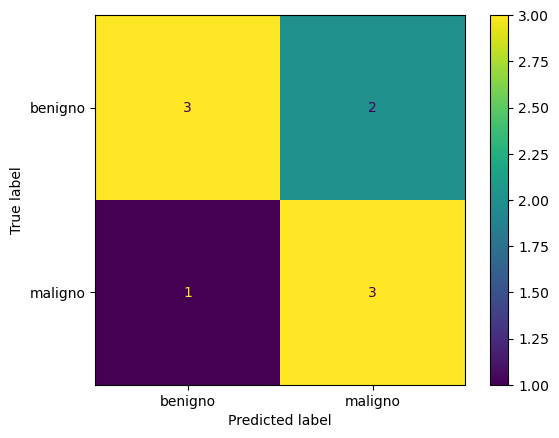

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_verdadero = ["benigno", "maligno", "maligno", "benigno", "benigno", "maligno", "benigno", "maligno", "benigno"]
y_prob = [0.24, 0.91, 0.85, 0.55, 0.33, 0.42, 0.51, 0.64, 0.39]
# suponiendo que elegimos como unbral 0.5
y_predicho = ["benigno", "maligno", "maligno", "maligno", "benigno", "benigno", "maligno", "maligno", "benigno"]

cm = confusion_matrix(y_verdadero, y_predicho)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["benigno","maligno"])
disp.plot();

A partir de la [matriz de confusion](https://en.wikipedia.org/wiki/Confusion_matrix) surgen las siguientes metricas:

- **Precision**: Verdaderos Positivos / (Total Predichos Positivos) proporcion de datos predichos correctamente sobre el total de predichos de la clase positiva. 
- **Recall**: Verdaderos Positivos / (Total Positivos) proporcion de datos predichos correctamente sobre el total de verdaderos de la clase positiva. 
- **F1 Score**: 2 / (1/P + 1/R) medida que contempla ambas metricas de precision y recall

Y si analizamos todas las matrices de confusion que surgen de elegir distintos umbrales aparecen nuevas metricas:

- **[ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)**: Nos muestra una curva con la **Tasa de Falsos Positivos** en el eje x y la **Tasa de Verdaderos Positivos** en el eje y
- **Area Under ROC Curve**: es el area debajo de la curva ROC y es una medida de la capacidad del clasificador para separar las clases
- **[Precision Recall Curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#plot-the-precision-recall-curve)**: Nos muestra una curva con **Recall** en el eje x y **Precision** en el eje y

In [34]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc

y_verdadero = ["benigno", "maligno", "maligno", "benigno", "benigno", "maligno", "benigno", "maligno", "benigno"]
y_prob = [0.24, 0.91, 0.85, 0.55, 0.33, 0.42, 0.51, 0.64, 0.39]
# suponiendo que elegimos como unbral 0.5
y_predicho = ["benigno", "maligno", "maligno", "maligno", "benigno", "benigno", "maligno", "maligno", "benigno"]

precision = metrics.precision_score(y_verdadero, y_predicho, pos_label="maligno")
print("Precision:", precision)
recall = metrics.recall_score(y_verdadero, y_predicho, pos_label="maligno")
print("Recall:", recall)

Precision: 0.6
Recall: 0.75


In [48]:
import pandas as pd
fpr, tpr, thresholds = metrics.roc_curve(y_verdadero, y_prob, pos_label="maligno")
pd.DataFrame({"Umbrales:":thresholds,"TPR:":tpr,"FPR:":fpr})

,Umbrales:,TPR:,FPR:
0,inf,0.00,0.0
1,0.91,0.25,0.0
2,0.64,0.75,0.0
3,0.51,0.75,0.4
4,0.42,1.00,0.4
5,0.24,1.00,1.0


In [ ]:
auc = metrics.auc(fpr, tpr)
print("AUC:", auc)

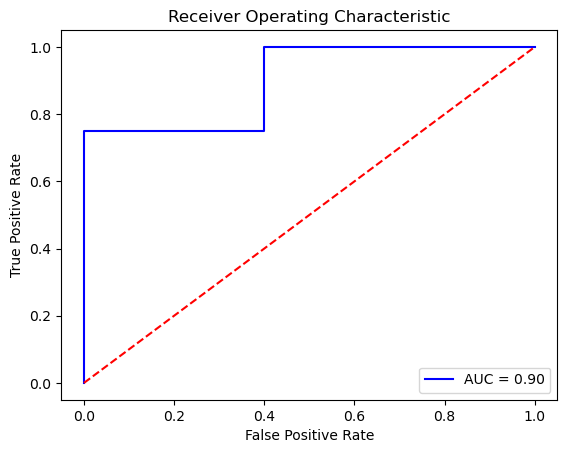

In [44]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Para regresion:

**MAE**:

[MAE](https://es.wikipedia.org/wiki/Error_absoluto_medio) el error absoluto medio es simplemente la media de los errores absolutos. Es decir, calculamos la diferencia entre los valores reales y nuestra prediccion, tomamos el valor absoluto y sacamos la media.

In [13]:
# supongamos que los datos verdaderos son
y_verdadero = [1.0, 2.0, 3.0, 4.0]
y_predicho = [1.6, 2.4, 3.2, 4.3]

MAE = (abs(1.0 - 1.6) + abs(2.0 - 2.4) + abs(3.0 - 3.2) + abs(4.0 - 4.3)) / 4
print(MAE)

0.375


In [14]:
from sklearn.metrics import mean_absolute_error
y_verdadero = [1.0, 2.0, 3.0, 4.0]
y_predicho = [1.6, 2.4, 3.2, 4.3]
mean_absolute_error(y_verdadero, y_predicho)

0.375

**R2**:

[R2](https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n) permite obtener un ya que varia entre 0 y 1 donde 0 indica que nuestra prediccion igual a haber predecido la media y 1 la prediccion perfecta. Puede que de valores negativos, en este caso nuestra prediccion es peor a predecir la media.

In [6]:
# supongamos que los datos verdaderos son
y_verdadero = [1.0, 2.0, 3.0, 4.0]
media = (1.0 + 2.0 + 3.0 + 4.0) / 4
y_predicho = [media, media, media, media]

metrics.r2_score(y_verdadero, y_predicho)

0.0

In [12]:
# supongamos que los datos verdaderos son
y_verdadero = [1.0, 2.0, 3.0, 4.0]
y_predicho = [1.6, 2.4, 3.2, 4.3]

metrics.r2_score(y_verdadero, y_predicho)

0.87

In [8]:
# supongamos que los datos verdaderos son
y_verdadero = [1.0, 2.0, 3.0, 4.0]
y_predicho = [1.0, 2.0, 3.0, 4.0]

metrics.r2_score(y_verdadero, y_predicho)

1.0

**RMSE**:

[RSME](https://es.wikipedia.org/wiki/Ra%C3%ADz_del_error_cuadr%C3%A1tico_medio) es la raiz del error cuadratico medio.

In [ ]:
from sklearn.metrics import root_mean_squared_error
y_verdadero = [1.0, 2.0, 3.0, 4.0]
y_predicho = [1.6, 2.4, 3.2, 4.3]
root_mean_squared_error(y_verdadero, y_predicho)

#### Grafico de residuos o errores

Una forma grafica de ver como se distribuyen nuestros errores es el grafico de residuos que no es otra cosa que el grafico de los errores, es decir, cada punto representa que tan lejos estuvimos de acertar cada dato. Estos puntos no deben mostrar ningun patron, deben ser aleatorios y lo mas cercanos a cero posible. 
- Si estan muy alejados de cero quiere decir que los errores son muy grandes.
- Si es grafico muestra algun patron quiere decir que nuestro modelo no capto ese patron.

In [30]:
import numpy as np
y_verdadero = np.arange(100)
y_predicho = y_verdadero + np.random.randn(100)
residuos = y_verdadero - y_predicho

<Axes: >

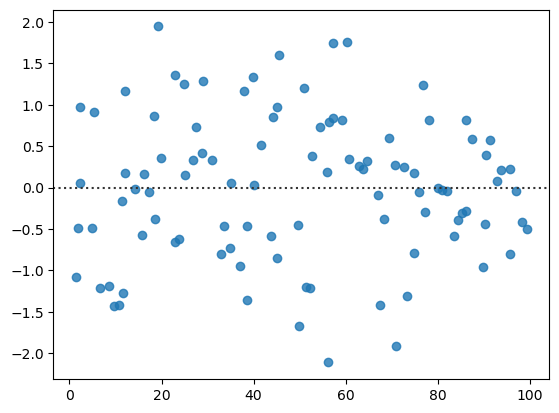

In [33]:
import seaborn as sns
sns.residplot(x=y_predicho,y=residuos);

### Configuracion de metricas en sklearn

Sklearn nos brinda una gran variedad de metricas y la posibilidad de configurar la metrica que queremos que utilice al realizar gridsearch y cross validation. En este [link](https://scikit-learn.org/stable/modules/model_evaluation.html#) podemos ver como hacerlo.

## Referencias:

- [Loss Functions and Metrics in Deep Learning](https://arxiv.org/abs/2307.02694)

# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/datascience/datascience.html)